In [23]:
import matplotlib.pyplot as plt
import numpy as np

In [24]:
# Parameters
num_samples = 1000
n_classes = 10
n_dim = 3
n_dim_high = 100

# Generate random means and covariances for each component
means = np.random.randn(n_classes, n_dim) * 10
rand_matrix = np.random.rand(n_dim, n_dim)
covariances = [rand_matrix @ rand_matrix.T + 0.1 * np.eye(n_dim) for _ in range(n_classes)]

# Normalize weights to sum to 1
weights = np.random.rand(n_classes)
weights /= np.sum(weights)

n_samples_comp = np.random.multinomial(num_samples, np.array(weights))

while 0 in n_samples_comp:
    weights = np.random.rand(n_classes)
    weights /= np.sum(weights)
    n_samples_comp = np.random.multinomial(num_samples, np.array(weights))

def non_linear_array(x):
    vec = np.array([x[0], x[1], x[2], x[0]*x[1], x[0]*x[2], x[1]*x[2]])
    return vec

data_list = []
for k, (mean, covariance, sample) in enumerate(zip(means, covariances, n_samples_comp)):
    array_3d = np.random.multivariate_normal(mean, covariance, int(sample))
    array_non_linear = np.zeros((int(sample), 6)) # 6 car non linéarité (x, y, z, xy, xz, yz) 
    for i in range(int(sample)):
        array_non_linear[i] = non_linear_array(array_3d[i])
    features = np.dot(array_non_linear, np.random.rand(6, n_dim_high))
    classes = k * np.ones(int(sample))
    data_list.append(np.concatenate([features, classes.reshape(-1, 1)], axis=1))

data = np.vstack(data_list)
data_feat = data[:, :-1]
data_class = data[:, -1]

In [25]:
def generate_random_spd_matrix(n):
    A = np.random.randn(n, n)
    spd_matrix = np.dot(A, A.T)  # Ensure the matrix is symmetric
    spd_matrix += np.eye(n) * 0.1  # Add a small multiple of the identity matrix for positive definiteness
    spectral_radius = np.max(np.abs(np.linalg.eigvals(spd_matrix)))
    if spectral_radius > 2:
        spd_matrix /= (spectral_radius/2)
    return spd_matrix

def affine_transformation(data_feat):
    product_matrix = generate_random_spd_matrix(n_dim_high)
    sum_vector = np.random.randn(1, n_dim_high)
    new_data_feat = np.dot(data_feat, product_matrix) + sum_vector
    return new_data_feat

domains = [data]
for i in range(5):
    new_data_feat = affine_transformation(data_feat)
    for c in range(n_classes):
        ind_c = np.where(data_class == c)[0]
        t_c = np.random.rand()
        new_data_feat[ind_c] = t_c * new_data_feat[ind_c]
    new_data = np.concatenate((new_data_feat, data_class.reshape(-1, 1)), axis=1)
    domains.append(new_data)

In [26]:
toy_dataset = np.concatenate((domains[0], np.zeros((domains[0].shape[0], 1))), axis=1)

for i in range(1, len(domains)):
    data_to_concatenate = np.concatenate((domains[i], i * np.ones((domains[0].shape[0], 1))), axis=1)
    toy_dataset = np.concatenate((toy_dataset, data_to_concatenate), axis=0)

In [21]:
np.save('toy_non_linear_100d_dataset_2.npy', toy_dataset)

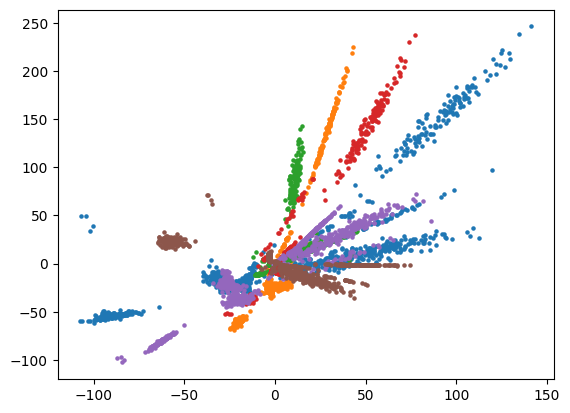

In [27]:
fig, ax = plt.subplots()
for i in range(len(domains)):
    ax.scatter(domains[i][:, 0], domains[i][:, 1], s = 5)

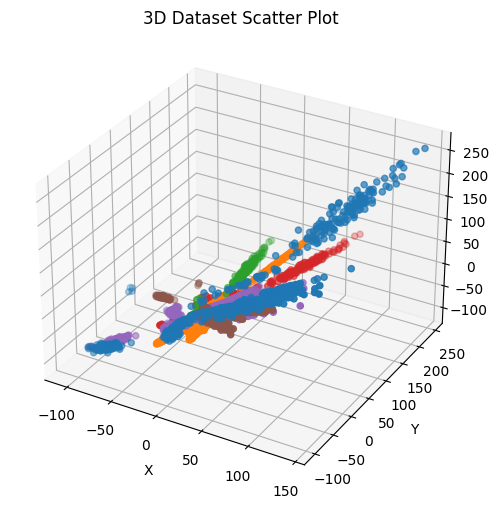

In [28]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the 3D dataset
for i in range(len(domains)):
    ax.scatter(domains[i][:, 0], domains[i][:, 1], domains[i][:, 2])

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set title
ax.set_title('3D Dataset Scatter Plot')

plt.show()

In [9]:
import skdim
import numpy as np

#estimate global intrinsic dimension
danco = skdim.id.DANCo().fit(toy_dataset[:, :-2])
#estimate local intrinsic dimension (dimension in k-nearest-neighborhoods around each point):
'''lpca = skdim.id.lPCA().fit_pw(toy_dataset[:, :-2],
                              n_neighbors = 100,
                              n_jobs = 1)'''

#get estimated intrinsic dimension
print(danco.dimension_)

2.2096017765980114
